# Multiple Linear Regression (How a Plane is dividing your 3D data)

- y = W0 + W1*X1 + W2*X2  [ where W0, W1, W2 are weights] -> for 3D(Plane)
- y = W0 + W1*X1 + W2*X2 + ..... + Wn*Xn  [for n features] -> for nD(Hyperplane)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression # Creates artificial (dummy) regression data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [64]:
df = pd.DataFrame({'feature1':X[:,0], 'feature2':X[:,1], 'target':y})
df.head()

,feature1,feature2,target
0,-0.361634,2.400105,-9.468710
1,0.309438,-0.285883,19.948848
2,-2.587399,0.868205,-182.703124
3,-2.286603,-0.964363,-149.115336
4,0.236366,-0.114212,53.629601


In [65]:
df.shape

(100, 3)

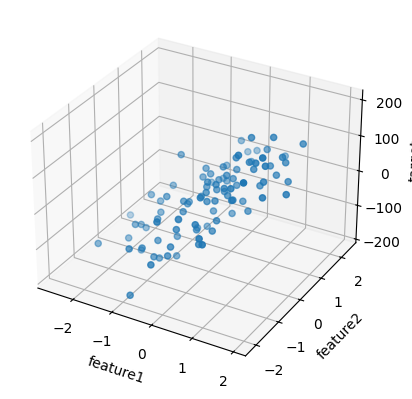

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Matplotlib is 2D by default. This import enables 3D projection support

fig = plt.figure()  # The entire canvas/window which Can contain one or more plots (axes)
ax = fig.add_subplot(111, projection='3d') # 111 means [1 row, 1 column, 1st plot] so, Single plot and Full figure space
ax.scatter(df['feature1'], df['feature2'], df['target'])
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('target')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [68]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test)

In [71]:
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("R2 : ", r2_score(y_test, y_pred))

MAE :  43.0091526622221
MSE :  3046.4934873889115
R2 :  0.6052386731907891


In [72]:
# Create 10 evenly spaced numbers between -5 and 5 for both x and y saparately
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
# Converts x and y into a full grid of points, xGrid(10,10), yGrid(10,10)
xGrid, yGrid = np.meshgrid(y, x)  # Creating a 2D grid (like graph paper)
# Create final input for prediction (100, 2), xGrid.ravel() Converts 10×10 grid into 100 x-values and same for yGrid.ravel() = 100
final = np.vstack((xGrid.ravel(), yGrid.ravel())).T  # also transpose
z = lr.predict(final).reshape(10, 10) # Model predicts 100 target values

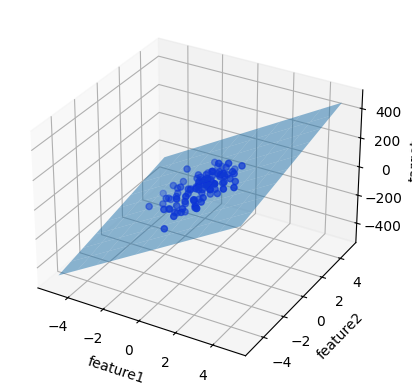

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # 111 means [1 row, 1 column, 1st plot Single plot]
ax.scatter(df['feature1'],df['feature2'],df['target'],color='blue',label='Actual Data')
ax.plot_surface(xGrid, yGrid, z, alpha=0.5)
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('target')
plt.show()

In [74]:
lr.coef_

array([71.77624192, 21.27194614])

In [75]:
lr.intercept_

np.float64(-7.35365415762112)